In [322]:
import scipy
import numpy as np
from scipy.ndimage import rotate
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation
from numpy import cos, sin, pi
import torch
import copy
import pickle

In [176]:
v = np.array([1,2,3])

In [177]:
m = Rotation.random()
r = m.as_matrix()
angles = m.as_euler('zxy')
angles

array([-2.97267173, -0.26871357,  1.34937866])

In [210]:
def zrot(thz):
    return np.array([[cos(thz), sin(thz), 0],
                 [-sin(thz), cos(thz), 0],
                 [0,0,1]
                ])

def yrot(thy):
    return np.array([[cos(thy), 0, sin(thy)],
                 [0, 1, 0],
                 [-sin(thy),0,cos(thy)]
                ])

def xrot(thx):
    return np.array([
                 [1, 0, 0],
                 [0, cos(thx), sin(thx)],
                 [0, -sin(thx), cos(thx)]
                ])


def rot(v, thz, thx, thy, signs):
    yr = yrot(signs[0]*thy)
    zr = zrot(signs[1]*thz)
    xr = xrot(signs[2]*thx)
    
    return np.einsum('ij,jk,kl,l-> i', yr,xr,zr, v)

In [211]:
v1 = np.einsum('ij,j->i', r, v)
v1

array([ 3.23327553, -1.26639284,  1.39362065])

In [213]:
signss = [(i,j,k) for i in (-1,1) for j in (-1,1) for k in (-1,1)]
res = []
for signs in signss:
    v2 = rot(v,*angles,signs=signs)
    if ((v2-v1)**2).sum() < 0.01:
        print(signs, v2)
    # res.append()

(1, -1, -1) (array([ 3.23327553, -1.26639284,  1.39362065]),)


In [214]:
d = 10
m = np.array([[(i-d/2)**2 + (j-d/2)**2 for i in range(d)] for j in range(d)])

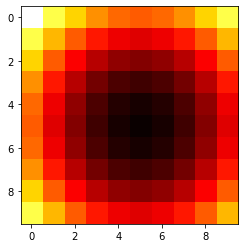

In [215]:
plt.imshow(m, cmap='hot', interpolation='nearest')
plt.show()

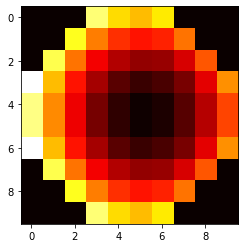

In [216]:
mode = 'constant'
angle = 45
m2 = rotate(m, angle, axes=[0,1], reshape=False, order=3, mode=mode)

plt.imshow(m2, cmap='hot', interpolation='nearest')
plt.show()

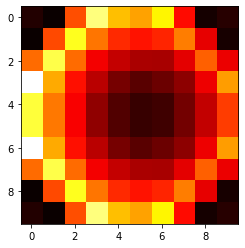

In [16]:
mode = 'grid-constant'
angle = 45
m2 = rotate(m, angle, axes=[0,1], reshape=False, order=3, mode=mode)

plt.imshow(m2, cmap='hot', interpolation='nearest')
plt.show()

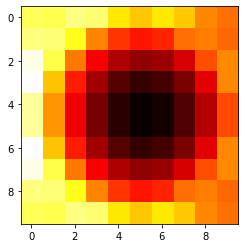

In [18]:
mode = 'nearest'
angle = 45
m2 = rotate(m, angle, axes=[0,1], reshape=False, order=3, mode=mode)

plt.imshow(m2, cmap='hot', interpolation='nearest')
plt.show()

In [361]:
class PickledGenerator(torch.Generator):
    def __getstate__(self):
        return self.get_state()
    def __setstate__(self, state):
        return self.set_state(state)

In [365]:
gen1 = PickledGenerator()
gen2 = PickledGenerator()
torch.rand(size=(1,), generator=gen1)

tensor([0.2673])

In [366]:
pic = pickle.dumps(gen1)
gen3 = pickle.loads(pic)

In [324]:
pic = pickle.dumps(gen1.get_state())

b'\x80\x04\x95C\x15\x00\x00\x00\x00\x00\x00\x8c\x0ctorch._utils\x94\x8c\x12_rebuild_tensor_v2\x94\x93\x94(\x8c\rtorch.storage\x94\x8c\x10_load_from_bytes\x94\x93\x94B\xbb\x14\x00\x00\x80\x02\x8a\nl\xfc\x9cF\xf9 j\xa8P\x19.\x80\x02M\xe9\x03.\x80\x02}q\x00(X\x10\x00\x00\x00protocol_versionq\x01M\xe9\x03X\r\x00\x00\x00little_endianq\x02\x88X\n\x00\x00\x00type_sizesq\x03}q\x04(X\x05\x00\x00\x00shortq\x05K\x02X\x03\x00\x00\x00intq\x06K\x04X\x04\x00\x00\x00longq\x07K\x04uu.\x80\x02(X\x07\x00\x00\x00storageq\x00ctorch\nByteStorage\nq\x01X\x0e\x00\x00\x0094890330381200q\x02X\x03\x00\x00\x00cpuq\x03M\xc0\x13Ntq\x04Q.\x80\x02]q\x00X\x0e\x00\x00\x0094890330381200q\x01a.\xc0\x13\x00\x00\x00\x00\x00\x00\x01\xd1\x9c\xf10=\x00\x00p\x02\x00\x00\x01\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x1d\xd7_\xae\x00\x00\x00\x00yVN\xea\x00\x00\x00\x00\x0f9\x1d\x04\x00\x00\x00\x00\x85\x87\xc0N\x00\x00\x00\x00{#ev\x00\x00\x00\x00\x92\xe6\x00\x9d\x00\x00\x00\x00\xdbj\xd9\x0b\x00\x00\x00\x00\xbfx\x19l\x00\x00\x00\

In [367]:
torch.rand(size=(1,), generator=gen3)

tensor([0.8725])

In [368]:
torch.rand(size=(1,), generator=gen2)

tensor([0.2673])

In [369]:
torch.rand(size=(1,), generator=gen2)

tensor([0.8725])

In [316]:
torch.rand(size=(1,), generator=gen1)

tensor([0.4030])

In [314]:
gen1.get_state()

tensor([  1, 209, 156,  ...,   0,   0,   0], dtype=torch.uint8)

In [ ]:
gen1.get_state()

In [223]:
gen.get_state()

torch.Size([5056])

In [241]:
Rotation.random(random_state=).as_euler('xyz')

AttributeError: 'torch._C.Generator' object has no attribute 'capsule'